**Name**: Ishant Tiwari<br>
**STATEMENT** : Smart Diet Prediction Based On Mood.<br>

In [ ]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np

# ✅ Step 2: Upload your 'food.csv' file manually if not already loaded
from google.colab import files
uploaded = files.upload()

# ✅ Step 3: Load the file (adjust filename if different)
food_df = pd.read_csv("food - food.csv")  # If name is different, use print(uploaded) to check


In [25]:
import pandas as pd

# Use raw string with r"" to avoid escape issues in Windows paths
file_path = r"/content/food - food.csv"
food_df = pd.read_csv(file_path)

# Display first 5 rows
food_df.head()


,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


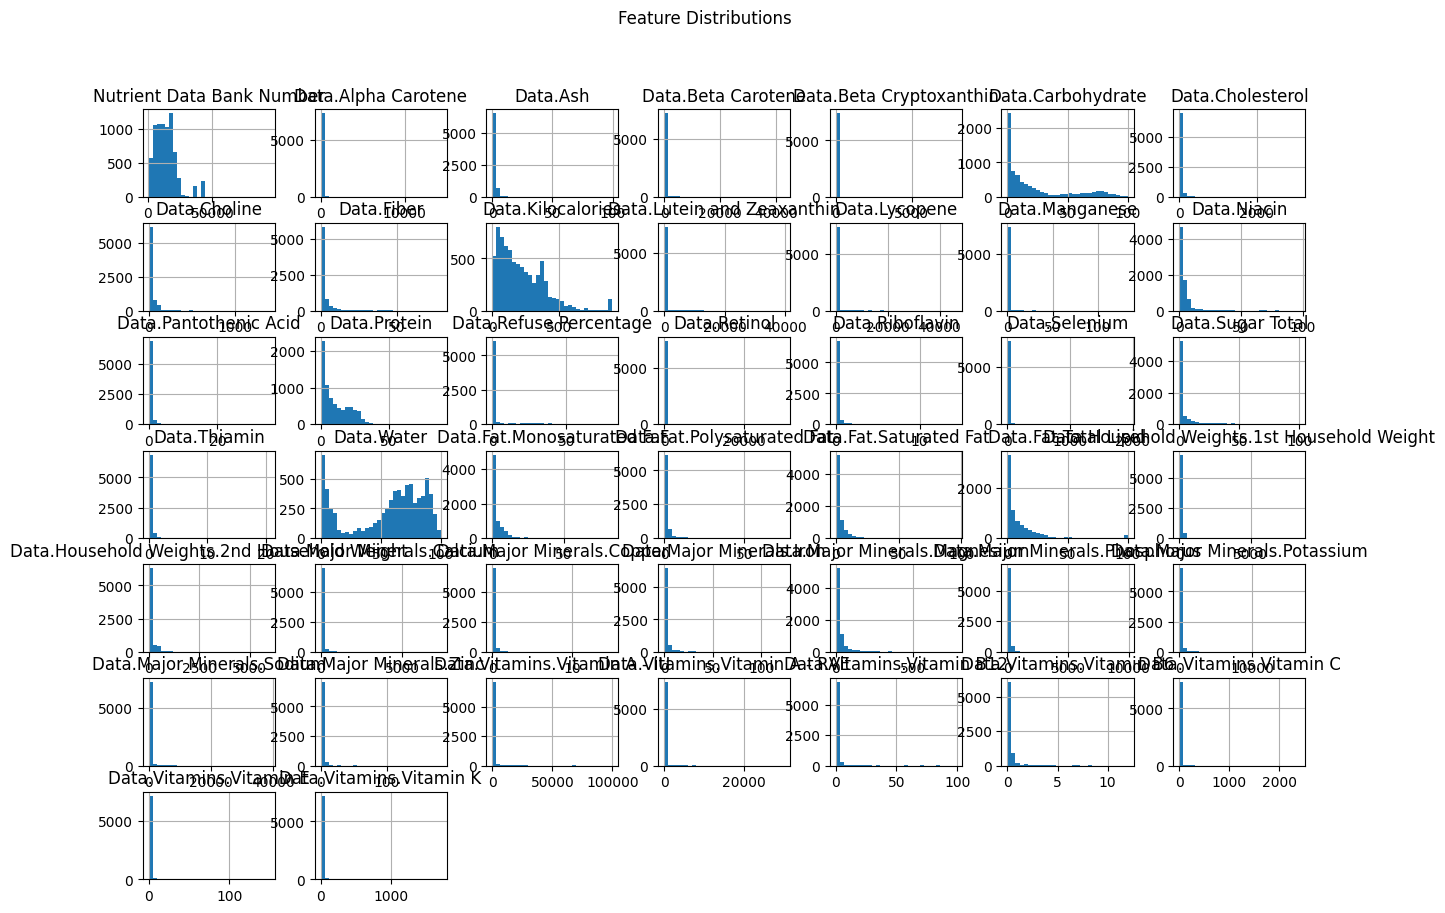

In [26]:
import matplotlib.pyplot as plt

# Use your actual DataFrame name
food_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


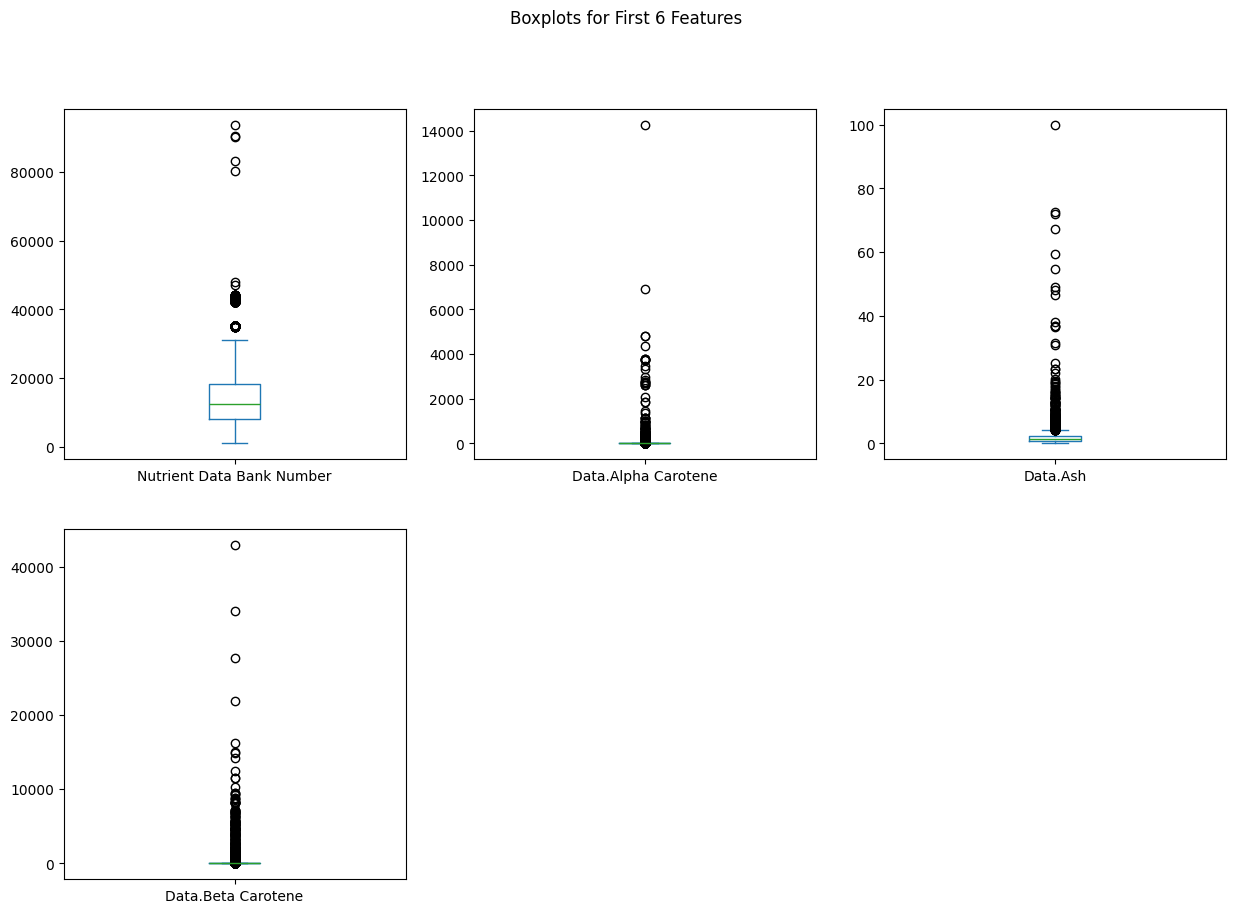

In [27]:
subset = food_df.iloc[:, :6]  # first 6 columns
subset.plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10))
plt.suptitle("Boxplots for First 6 Features")
plt.show()


In [47]:

# See dataset shape and data types
food_df.info()

# Display column names
print("Columns in dataset:", food_df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 49 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Original_Description                                     7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Carbs                                                    7413 non-null   float64
 8   Data.Cholesterol            

In [48]:
# View basic statistics for numeric columns
food_df.describe()


,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Carbs,Data.Cholesterol,Data.Choline,Data.Fiber,Calories,...,Data.Major Minerals.Potassium,Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - Iu,Data.Vitamins.Vitamin A - Rae,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
count,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,...,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000
mean,14116.443680,21.210711,1.852459,159.043437,8.776744,21.785381,37.162822,20.673546,1.993147,219.655875,...,268.348172,331.590719,1.875125,767.568191,99.437070,1.172903,0.269547,9.075651,0.842837,9.448604
std,8767.416214,269.714183,2.993228,1126.285026,154.184860,27.123491,119.738438,45.481990,4.292873,171.668713,...,404.916220,977.046544,4.193682,3871.307652,761.653061,4.512816,0.565116,63.443284,4.169756,66.067619
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8121.000000,0.000000,0.830000,0.000000,0.000000,0.490000,0.000000,0.000000,0.000000,82.000000,...,103.000000,31.000000,0.190000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
50%,12539.000000,0.000000,1.240000,0.000000,0.000000,9.290000,2.000000,0.000000,0.300000,181.000000,...,210.000000,86.000000,0.770000,33.000000,0.000000,0.010000,0.110000,0.000000,0.050000,0.000000
75%,18424.000000,0.000000,2.200000,1.000000,0.000000,30.590000,60.000000,20.000000,2.300000,331.000000,...,328.000000,428.000000,2.460000,280.000000,24.000000,0.830000,0.330000,3.500000,0.390000,1.700000
max,93600.000000,14251.000000,99.800000,42891.000000,7923.000000,100.000000,3100.000000,1388.000000,79.000000,902.000000,...,16500.000000,38758.000000,181.610000,100000.000000,30000.000000,98.890000,12.000000,2400.000000,149.400000,1714.500000


In [42]:
# Rename columns if needed
food_df.rename(columns={
    'Data.Protein': 'Protein',
    'Data.Carbohydrate': 'Carbs',
    'Data.Fat.Total Lipid': 'Fat',
    'Data.Sugar Total': 'Sugar',
    'Data.Major Minerals.Sodium': 'Sodium',
    'Data.Kilocalories': 'Calories'
}, inplace=True)

# Define features and target
features = ['Protein', 'Carbs', 'Fat', 'Sugar', 'Sodium']
target = 'Calories'

X = food_df[features]
y = food_df[target]


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [45]:
y_pred = model.predict(X_test)


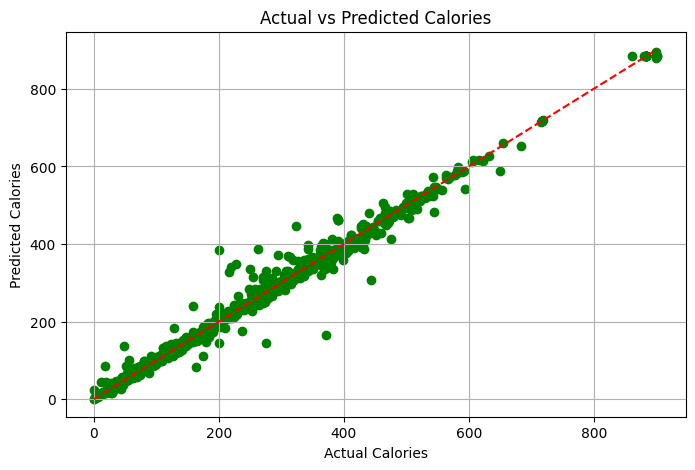

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.grid(True)
plt.show()


In [35]:
# ✅ Step 4: Clean column names
food_df.columns = food_df.columns.str.strip().str.title()

# Fix column names like 'Protein', 'Kilocalories' etc.
# Use correct dataset column names
food_df.rename(columns={
    'Data.Protein': 'Protein',
    'Data.Carbohydrate': 'Carbs',
    'Data.Fat.Total Lipid': 'Fat',
    'Data.Sugar Total': 'Sugar',
    'Data.Major Minerals.Sodium': 'Sodium',
    'Data.Kilocalories': 'Calories',
    'Description': 'Original_Description'
}, inplace=True)


In [36]:
# ✅ Step 5: Clean up food names for display
def clean_description(text):
    text = str(text).lower().replace(',', ' ').replace('_', ' ')
    text = text.replace('w/salt', 'with salt').replace('wo/salt', 'without salt')
    text = text.replace('frz', 'frozen').replace('ckd', 'cooked').replace('drnd', 'drained').replace('bld', 'boiled')
    return ' '.join(word.capitalize() for word in text.split())

food_df['Clean_Name'] = food_df['Original_Description'].apply(clean_description)


In [37]:
# ✅ Step 6: Check actual categories (important for fixing the logic)
print("Available categories:\n", food_df['Category'].unique())


Available categories:
 ['BUTTER' 'BUTTER OIL' 'CHEESE' ... 'FROG LEGS' 'SNAIL' 'TURTLE']


In [32]:
['Vegetables', 'Fruits', 'Protein Foods', 'Beverages', 'Fats and Oils', ...]


['Vegetables',
 'Fruits',
 'Protein Foods',
 'Beverages',
 'Fats and Oils',
 Ellipsis]

In [38]:
# ✅ Step 7: Mood-based Recommender Logic
def recommend_food_by_mood(mood):
    mood = mood.lower()

    if mood == "sad":
        # Comfort food = high calorie + fats/protein
        result = food_df[
            food_df['Category'].str.contains("Protein|Fats|Grains", na=False, case=False) &
            (food_df['Calories'] > 150)
        ]
    elif mood == "tired":
        # High energy foods
        result = food_df[(food_df['Protein'] > 10) & (food_df['Carbs'] > 10)]
    elif mood == "stressed":
        # Sweet, fruity, nutty
        result = food_df[
            food_df['Category'].str.contains("Fruits|Nuts", na=False, case=False) &
            (food_df['Sugar'] > 5)
        ]
    elif mood == "happy":
        # Light and fresh
        result = food_df[
            food_df['Category'].str.contains("Fruits|Vegetables", na=False, case=False) &
            (food_df['Calories'] < 120)
        ]
    elif mood == "neutral":
        result = food_df
    else:
        print("⚠️ Unknown mood, showing random suggestions.")
        result = food_df

    # Handle case where result is empty
    if result.empty:
        print("😕 No matching foods found. Showing random items instead.")
        result = food_df

    return result.sample(min(3, len(result)))  # Return up to 3


In [40]:
# ✅ Step 8: Get user input and show recommendations
mood = input("How are you feeling today? (happy / sad / tired / stressed / neutral): ").strip().lower()

recommendations = recommend_food_by_mood(mood)

print("\n🥗 Recommended Foods for Your Mood:\n")

for i, row in recommendations.iterrows():
    emoji = "🍗" if "Protein" in row['Category'] else "🍎" if "Fruit" in row['Category'] else "🥦"
    print(f"{emoji} {row['Clean_Name']} — {row['Calories']} kcal | Protein: {row['Protein']}g | Carbs: {row['Carbs']}g")


How are you feeling today? (happy / sad / tired / stressed / neutral): happy

🥗 Recommended Foods for Your Mood:

🥦 Vegetables Mxd Cnd Sol&liquids — 36 kcal | Protein: 1.42g | Carbs: 7.13g
🥦 Vegetables Mxd Frozen Unprep — 64 kcal | Protein: 3.33g | Carbs: 13.46g
🥦 Vegetables Mxd Frozen Cooked Boiled Drained With Salt — 60 kcal | Protein: 2.86g | Carbs: 13.09g
